# 05_07: Temperature Anomaly Solution

In [1]:
import math
import collections
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
import getweather

def smooth(array, window=10, mode='valid'):
    return np.correlate(array, np.ones(window)/window, mode)

In [4]:
# get all historical data for New York, stacked into array

station = 'PASADENA'

allyears = np.arange(1880, 2020)

alldata = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                     for year in allyears])

In [5]:
# compute (TMIN + TMAX)/2, averaged over days in every year
allavg = np.nanmean(0.5 * (alldata['TMIN'] + alldata['TMAX']), axis=1)

C:\Users\Luis\AppData\Local\Temp\ipykernel_5496\3444122191.py:2: RuntimeWarning: Mean of empty slice
  allavg = np.nanmean(0.5 * (alldata['TMIN'] + alldata['TMAX']), axis=1)


In [6]:
allavg.shape

(140,)

In [7]:
allyears.index(1945)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [8]:
# find the index of values 1945 and 1955 in allyears
list(allyears).index(1945), list(allyears).index(1955)

(65, 75)

In [9]:
midcentury = np.nanmean(allavg[65:75])

In [10]:
midcentury

17.018181214651747

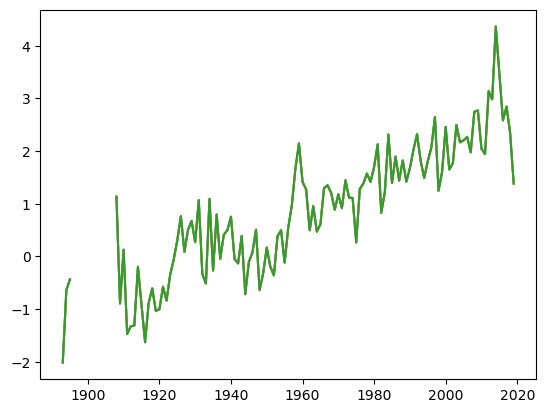

In [13]:
pp.plot(allyears, allavg - midcentury)
pp.show()

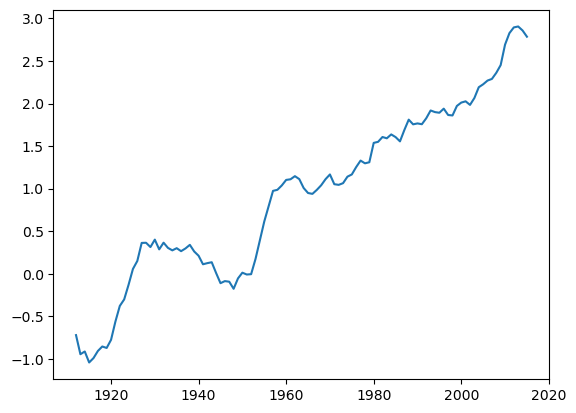

In [14]:
pp.plot(allyears[4:-4], smooth(allavg - midcentury, 9, 'valid'))
pp.show()

In [15]:
# compute and plot the temperature anomaly time series for any station

allyears = np.arange(1880, 2020)

def plotanomaly(station):
    # grab the data
    alldata = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                         for year in allyears])
    
    # make yearly averages, and then the midcentury average
    allavg = np.nanmean(0.5 * (alldata[:,:]['TMIN'] + alldata[:,:]['TMAX']), axis=1)
    midcentury = np.nanmean(allavg[65:75])
    
    # plot with smoothing, adding a label that we can show in a legend
    pp.plot(allyears[4:-4], smooth(allavg - midcentury, 9, 'valid'), label=station)
    
    # set a reasonable range
    pp.axis(ymin=-3,ymax=3)

C:\Users\Luis\AppData\Local\Temp\ipykernel_5496\2332485820.py:11: RuntimeWarning: Mean of empty slice
  allavg = np.nanmean(0.5 * (alldata[:,:]['TMIN'] + alldata[:,:]['TMAX']), axis=1)


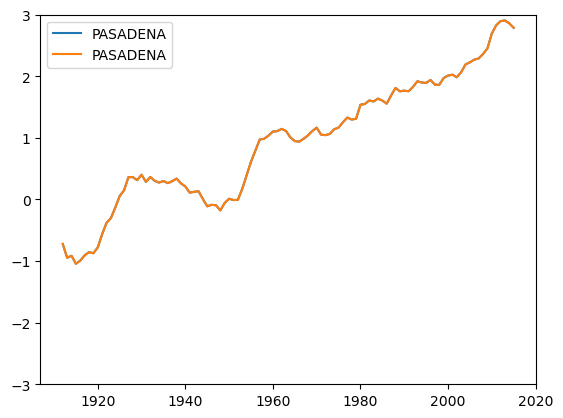

In [20]:
plotanomaly('PASADENA')
pp.legend()
pp.show()